# Dishonest Internet User Classification

## Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOADING DATASET AND PRINTING FIRST 5 ROWS
Data=pd.read_csv('C:/Users/saksh/Downloads/main.csv')
print(Data.head())

   ctrust  cuntrust  last context          score
0       4         1     4   sport  untrustworthy
1       4         1     4   sport  untrustworthy
2       1         4     4   sport    trustworthy
3       2         1     4   sport    trustworthy
4       3         1     4   sport    trustworthy


In [3]:
#NUMBER OF COLUMNS AND ROWS IN THE DATASET
print(Data.shape)

(322, 5)


In [4]:
#INFORMATION REGARDING DATASET
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ctrust    322 non-null    int64 
 1   cuntrust  322 non-null    int64 
 2   last      322 non-null    int64 
 3   context   322 non-null    object
 4   score     322 non-null    object
dtypes: int64(3), object(2)
memory usage: 12.7+ KB
None


In [5]:
#STATISTICAL INFORMATION OF DATASET
print(Data.describe())

           ctrust    cuntrust        last
count  322.000000  322.000000  322.000000
mean     2.195652    1.527950    2.366460
std      1.273592    1.105422    1.347384
min      1.000000    1.000000    1.000000
25%      1.000000    1.000000    1.000000
50%      2.000000    1.000000    2.000000
75%      4.000000    1.000000    4.000000
max      4.000000    5.000000    4.000000


In [6]:
#TOTAL NUMBER OF NULL VALUES IN EACH COLUMN OF DATASET
print(Data.isna().sum())

ctrust      0
cuntrust    0
last        0
context     0
score       0
dtype: int64


In [7]:
print("ctrust",Data['ctrust'].unique())
print("cuntrust",Data['cuntrust'].unique())
print("last",Data['last'].unique())
print("context",Data['context'].unique())
print("score",Data['score'].unique())

ctrust [4 1 2 3]
cuntrust [1 4 3 5]
last [4 1 3 2]
context ['sport' 'game' 'ECommerce' 'holiday']
score ['untrustworthy' 'trustworthy']


## Data Visualizations

<AxesSubplot:xlabel='score', ylabel='count'>

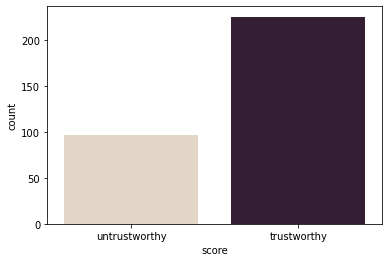

In [8]:
sns.countplot(x='score',data=Data, palette="ch:.25")

<AxesSubplot:xlabel='score', ylabel='count'>

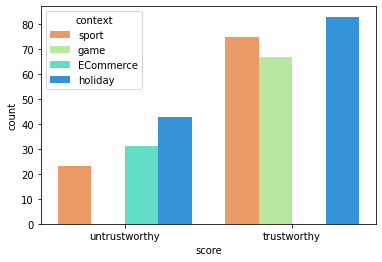

In [9]:
sns.countplot(x='score', hue='context',data=Data,palette='rainbow_r')

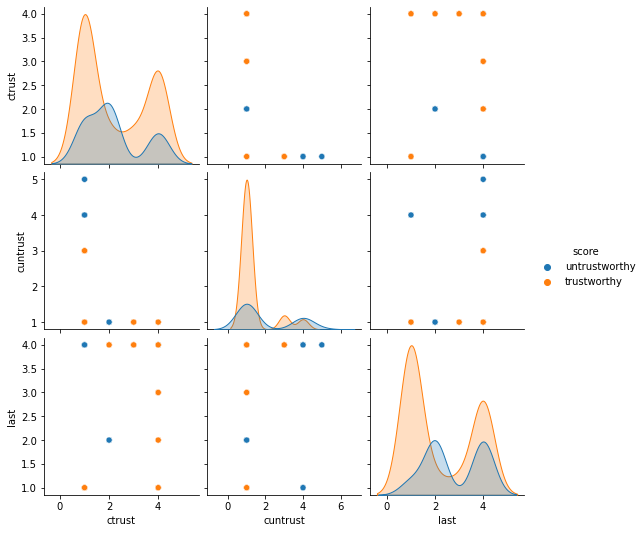

In [10]:
sns.pairplot(Data,hue="score")

## Data Preprocessing

### Converting Categorical Data Into Numeric Data

In [11]:
#SPECIFYING CATEGORICAL DATA
cat_data=Data.select_dtypes(include=['object'])
print(cat_data.columns)

Index(['context', 'score'], dtype='object')


In [12]:
#MAPPING CATEGORICAL VALUES INTO INTEGRAL VALUES
Data['score'].replace({'untrustworthy':0,'trustworthy':1}, inplace=True)
Data['context'].replace({'sport':0,'game':1,'ECommerce':2,'holiday':3}, inplace=True)
print(Data.head())

   ctrust  cuntrust  last  context  score
0       4         1     4        0      0
1       4         1     4        0      0
2       1         4     4        0      1
3       2         1     4        0      1
4       3         1     4        0      1


### Feature Scaling

In [13]:
#FEATURE SCALING-NORMALIZATION
y=Data['score'].values
data_x=Data.drop(['score'],axis=1)
x=(data_x-np.min(data_x))/(np.max(data_x)-np.min(data_x))
print(x)

       ctrust  cuntrust      last  context
0    1.000000      0.00  1.000000      0.0
1    1.000000      0.00  1.000000      0.0
2    0.000000      0.75  1.000000      0.0
3    0.333333      0.00  1.000000      0.0
4    0.666667      0.00  1.000000      0.0
..        ...       ...       ...      ...
317  0.333333      0.00  0.333333      1.0
318  0.000000      0.00  0.000000      1.0
319  0.000000      0.00  0.000000      1.0
320  0.000000      0.00  0.000000      1.0
321  0.333333      0.00  0.333333      1.0

[322 rows x 4 columns]


### Train Test Split

In [14]:
#SPLITTING DATA INTO TRAINING AND TESTING DATASET
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Import Classifiers

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


### Random Forest Classifier

In [16]:
rf=RandomForestClassifier(n_estimators=10,max_depth=3)
rf.fit(x_train,y_train)

pred_y_rf=rf.predict(x_test)

accuracy_rf=accuracy_score(y_test,pred_y_rf)
print(accuracy_rf)

0.9538461538461539


In [17]:
#CONFUSION MATRIX
cm_rf=confusion_matrix(y_test,pred_y_rf)
print(cm_rf)

[[14  3]
 [ 0 48]]


In [18]:
#CLASSIFICATION REPORT
print(classification_report(y_test,pred_y_rf))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.94      1.00      0.97        48

    accuracy                           0.95        65
   macro avg       0.97      0.91      0.94        65
weighted avg       0.96      0.95      0.95        65



### Logistic Regression

In [19]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

pred_y_lr=lr.predict(x_test)

accuracy_lr=accuracy_score(y_test,pred_y_lr)
print(accuracy_lr)

0.9230769230769231


In [20]:
#CONFUSION MARIX
cm_lr=confusion_matrix(y_test,pred_y_lr)
print(cm_lr)

[[12  5]
 [ 0 48]]


In [21]:
#CLASSIFICATION REPORT
print(classification_report(y_test,pred_y_lr))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.91      1.00      0.95        48

    accuracy                           0.92        65
   macro avg       0.95      0.85      0.89        65
weighted avg       0.93      0.92      0.92        65



### Support Vector Classifier

In [22]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

pred_y_svc=svc.predict(x_test)

accuracy_svc=accuracy_score(y_test,pred_y_svc)
print(accuracy_svc)

0.8769230769230769


In [23]:
#CONFUSION MATRIX
cm_svc=confusion_matrix(y_test,pred_y_svc)
print(cm_svc)

[[12  5]
 [ 3 45]]


In [24]:
#CLASSIFICATION REPORT
print(classification_report(y_test,pred_y_svc))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.90      0.94      0.92        48

    accuracy                           0.88        65
   macro avg       0.85      0.82      0.83        65
weighted avg       0.87      0.88      0.87        65



### Naive Bayes Classifier

In [25]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

pred_y_gnb=gnb.predict(x_test)

accuracy_gnb=accuracy_score(y_test,pred_y_gnb)
print(accuracy_gnb)


0.6923076923076923


In [26]:
#CONFUSION MATRIX
cm_gnb=confusion_matrix(y_test,pred_y_gnb)
print(cm_gnb)

[[ 5 12]
 [ 8 40]]


In [27]:
#CLASSIFICATION REPORT
print(classification_report(y_test,pred_y_gnb))

              precision    recall  f1-score   support

           0       0.38      0.29      0.33        17
           1       0.77      0.83      0.80        48

    accuracy                           0.69        65
   macro avg       0.58      0.56      0.57        65
weighted avg       0.67      0.69      0.68        65



In [28]:
#DISPLAY TESTING ACCURACIES FOR ALL CLASSIFIERS
classifiers=[["Random Forest",accuracy_rf],["Logistic Regression",accuracy_lr],["Support Vector Machine",accuracy_svc],["Naive Bayes Classifier",accuracy_gnb]]
df=pd.DataFrame(classifiers,columns=["Classifiers","Accuracy"])
display(df)

,Classifiers,Accuracy
0,Random Forest,0.953846
1,Logistic Regression,0.923077
2,Support Vector Machine,0.876923
3,Naive Bayes Classifier,0.692308
